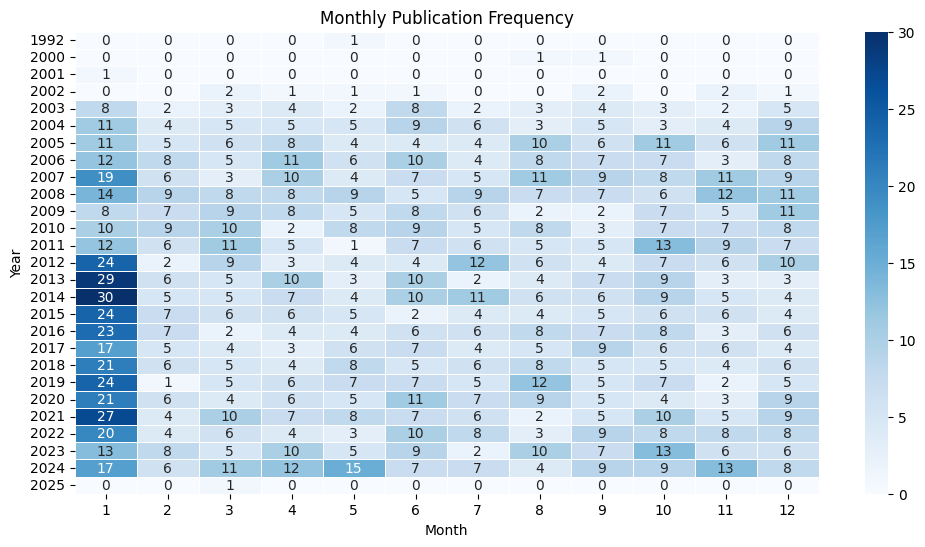

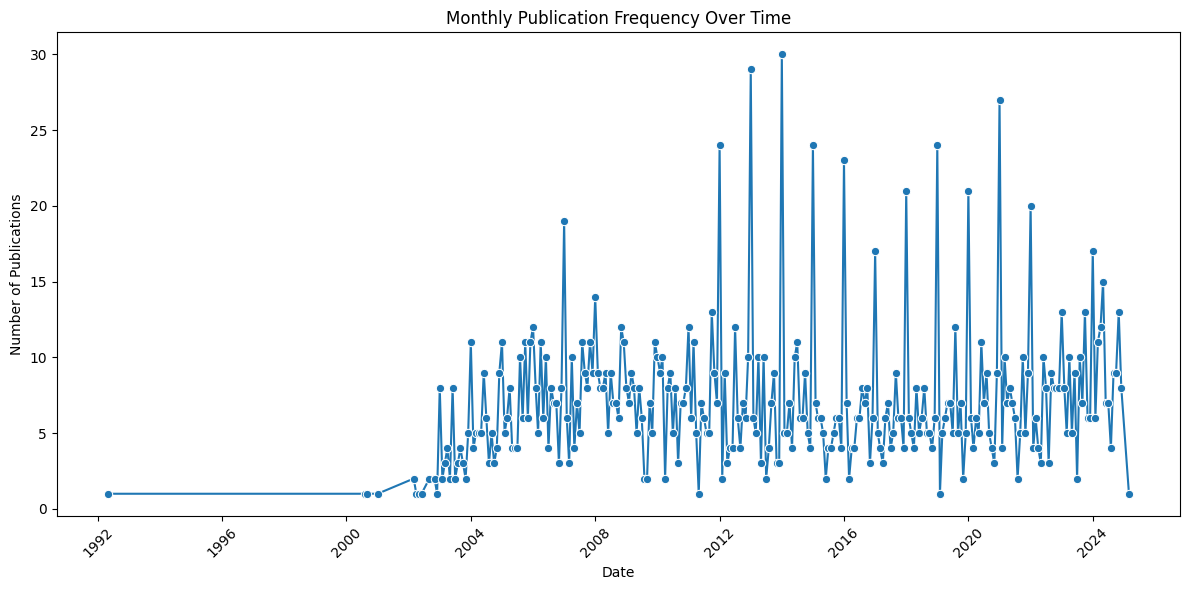

Cluster labels for each article:
                                               title  category
0  Emerging lineages A2.2.1 and A2.2.2 of human m...         1
1  Analysis of respiratory pathogen detection in ...         2
2  Metapneumovirus-Induced Myocarditis Complicate...         1
3  Burden of viral respiratory infections in the ...         2
4  Clinical outcomes and severity of laboratory-c...         1


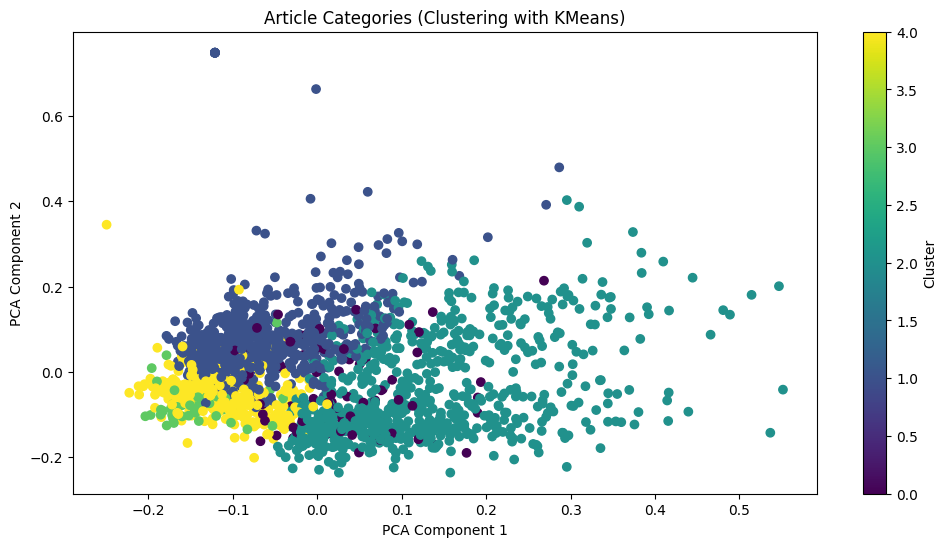

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample dataset (replace this with your actual dataset)
data = pd.read_csv('data/articles.csv')

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'published' column to datetime
df['published'] = pd.to_datetime(df['published'])

# Extract year, month, and day of the week
df['year'] = df['published'].dt.year
df['month'] = df['published'].dt.month
df['day_of_week'] = df['published'].dt.dayofweek  # 0=Monday, 6=Sunday

# Handle missing values in the 'title' column
df['title'] = df['title'].fillna('')  # Replace NaN titles with empty strings

# Group by year and month to see publication frequency
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

# Pivot the data for the heatmap
monthly_pivot = monthly_counts.pivot(index='year', columns='month', values='count').fillna(0)

# Plot the number of publications per month/year
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)
plt.title('Monthly Publication Frequency')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

# Plotting publication frequency over time (Line Plot)
plt.figure(figsize=(12, 6))
monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))  # create a date column
sns.lineplot(x='date', y='count', data=monthly_counts, marker='o')
plt.title('Monthly Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 1: Categorize articles based on titles using TF-IDF + KMeans Clustering ---

# Step 2: Convert the article titles to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')  # Remove stop words
X = vectorizer.fit_transform(df['title'])

# Step 3: Apply KMeans clustering to categorize the articles
num_clusters = 5  # Number of clusters you want to create (can adjust this)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['category'] = kmeans.fit_predict(X)

# Step 4: Add cluster labels to the original DataFrame
print("Cluster labels for each article:")
print(df[['title', 'category']].head())  # Display the first few articles and their assigned cluster

# Step 5: Visualize the clustering (optional, if you want to see how they group)
# You can use PCA (Principal Component Analysis) to reduce the dimensionality for plotting purposes.
from sklearn.decomposition import PCA

# Reduce the TF-IDF matrix to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Create a scatter plot of the articles based on their cluster assignments
plt.figure(figsize=(12, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['category'], cmap='viridis')
plt.title('Article Categories (Clustering with KMeans)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
